## Imports

In [8]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [23]:
def solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    for it in range(nt):
        for i in range(row): un[i] = u[i]
        for k in range(row): vn[i] = v[i]  
        for j in range(2, col):
            for i in range(2, row):
                u[j-1, i-1] = un[j-1, i-1]-un[j-1, i-1]*dt/dx * (un[j-1, i-1]-un[j-1, i-2])-vn[j-1, i-1]*dt/dy * (un[j-1, i-1]-un[j-2, i-1])
                v[j-1, i-1] = vn[j-1, i-1]-un[j-1, i-1]*dt/dx * (vn[j-1, i-1]-vn[j-1, i-2])-vn[j-1, i-1]*dt/dy * (vn[j-1, i-1]-vn[j-2, i-1])


    
    #fill the update of u and v
        
    return 0

## Numba accelerator

In [25]:
@njit(fastmath=True)
def solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    for it in range(nt):
        for i in range(row): un[i] = u[i]
        for k in range(row): vn[i] = v[i]  
        for j in range(2, col):
            for i in range(2, row):
                u[j-1, i-1] = un[j-1, i-1]-un[j-1, i-1]*(dt/dx) * (un[j-1, i-1]-un[j-1, i-2])-vn[j-1, i-1]*(dt/dy) * (un[j-1, i-1]-un[j-2, i-1])
                v[j-1, i-1] = vn[j-1, i-1]-un[j-1, i-1]*(dt/dx) * (vn[j-1, i-1]-vn[j-1, i-2])-vn[j-1, i-1]*(dt/dy) * (vn[j-1, i-1]-vn[j-2, i-1])

    
    #fill the update of u and v
        
    return 0

## Pyccel accelerator

In [11]:
@types('float[:,:]', 'float[:,:]','float[:,:]', 'float[:,:]','int','float','float','float', 'float')
def solve_2d_nonlinearconv_pyccel(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    for it in range(nt):
        for i in range(row): un[i] = u[i]
        for k in range(row): vn[i] = v[i]  
        for j in range(2, col):
            for i in range(2, row):
                u[j-1, i-1] = un[j-1, i-1]-un[j-1, i-1]*dt/dx * (un[j-1, i-1]-un[j-1, i-2])-vn[j-1, i-1]*dt/dx * (un[j-1, i-1]-un[j-2, i-1])
                v[j-1, i-1] = vn[j-1, i-1]-un[j-1, i-1]*dt/dx * (vn[j-1, i-1]-vn[j-1, i-2])-vn[j-1, i-1]*dt/dx * (vn[j-1, i-1]-vn[j-2, i-1])

    
    #fill the update of u and v
        
    return 0

## Inputs

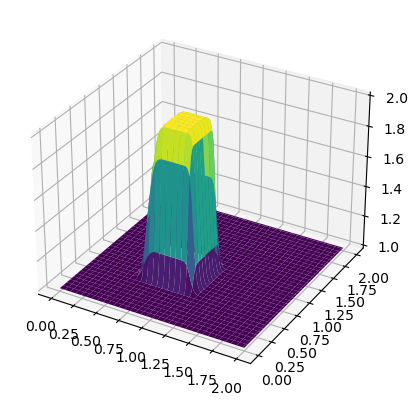

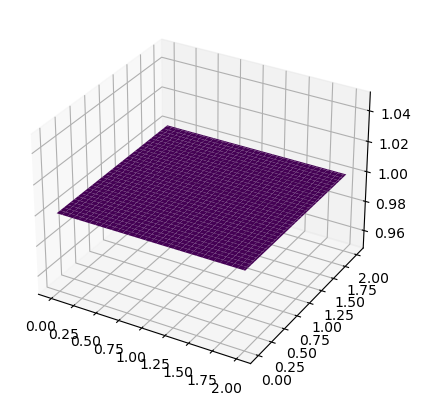

In [28]:
###variable declarations
nx = 101
ny = 101
nt = 20
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx)) ##create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))     

solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)


fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, v, cmap=cm.viridis)

## Call Funtions

### Pure function

In [13]:
%timeit solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

7.89 s ± 29.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [17]:
%timeit solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c)

11.8 ms ± 3.65 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Function with pyccel accelerator

In [15]:
solve_2d_nonlinearconv_f90 = epyccel(solve_2d_nonlinearconv_pyccel)

In [16]:
%timeit solve_2d_nonlinearconv_f90(u, un, v, vn, nt, dt, dx, dy, c)

9.53 ms ± 18 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
